# Weight Lifting 
There are many ways of working out.  This notebook is about lifting weights.  I am not a sports physician and what works for most people may not be what is best for you.  I make no claims about the efficiency of the formulas presented and as always consult your physician or licensed trainer for your personal workout guidelines.  These guidleines are presented here as the fruit of ten years of research in the subject of lifting heavy things as a way to promote health and wellness.  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

S = Stage  
W = Week  
WPW = Workouts Per Week  
P = Pounds Per Repetition  
NS = Number Sets  
RPS = Repetitions Per Set   
MW = Muscle Weight  
BW = Body Weight  
BFP = Body Fat Percentage  
W = Waste Weight

# Stage
The athletes current level of experience with strength training exercies.

In [2]:
stages = {'beginner', 'intermediate', 'advanced', 'expert'}
S = 'Expert'

**Beginner**  - You have decided to change your life and bought a gym membership or some home equipment.  
**Intermediate** - You diet, and go to the gym.  
**Advanced** - You are aware of your daily protein intake and try to balance various training methods.  
**Expert** - There is a way you could be training at the moment and people like your cooking.

# Week
The athetes current position in time in a training cycle.

In [3]:
W = 0

# Workouts Per Week
This will vary on a per case basis by body type, conditioning level and age.  Additionally the number of workouts per week is modified by the goal of the athlete.  For muscle growth, it is required to rest.  Workouts may be performed on the same day.

In [4]:
WPW = 5 #With Weights

In [5]:
def applyStageToWPW(stage):
    return {'beginner':3, 'intermediate':4, 'advanced':5, 'expert':6}[stage.lower()]

In [6]:
applyStageToWPW('Expert')

6

# Body Weight
An Athletes actual weight.

In [7]:
BW = 165

# Body Fat Percentage
The percentage of fat reported on an athlete by a physician.  
https://www.mensjournal.com/health-fitness/what-4-specific-body-fat-percentage-ranges-look-men/18-20/  
According to Mens journal an intermediate range of fat is 18-24%, Advanced range is 17-14% and Athletes can safely remain at a minimum of 6-13% without causing risk to themselves.  

In [8]:
BFP = 15

# Waste Weight

In [9]:
W = 10

# Muscle Weight
An Athletes Muscle weight (The weight of your body minus waste and fat). 

In [10]:
MW = (BW - ((BW*(BFP/100))))-W

In [11]:
MW

130.25

# Pounds Per Repitition
The number of pounds to put up per repitition.  
Each repetition should be performed in a manner that proper form is maintained and no stress is sent to any particular joint or feature of the body.  Maintaining a proper spinal position is the most important part of a good clean repetition.  The amount of weight used should be comfortable enough that at the point of muscle failure, you can cleanly return the weight to the starting position without stressing your back or joints.  A higher amount of weight makes this proportionally more difficult at the edge of the muscle sets capability, which is where you want to stay, for as long as comfortably possible.  Leg extension weights are set for one leg only.

In [53]:
def applyStagetoPPS(stage, MW):
    forms = {'Bench_Press':MW*.65, 'Squat':MW*.85, 'Curl':MW*.15, 
     'Press':MW*.20, 'Leg_Extension':(MW*.4)/2, 'Calf_Raise':MW*.65}
    stages = {'beginner':.0, 'intermediate':.2, 'advanced':.35, 'expert':.5}
    current_form = {}
    for exercise in forms:
        current_form[exercise] = forms[exercise] + (forms[exercise]*stages[stage.lower()])
    return current_form

In [54]:
workouts = applyStagetoPPS('advanced', MW)

In [55]:
workouts

{'Bench_Press': 114.294375,
 'Squat': 149.461875,
 'Curl': 26.375624999999996,
 'Press': 35.167500000000004,
 'Leg_Extension': 35.167500000000004,
 'Calf_Raise': 114.294375}

# Repetitions Per Set
The number of repetitions per set depends upon the point of muscle fatigue you can deal with.  The first set of three, an athlete should be able to perform 20 repetitions at the weight listed for the scale applied.  Remember that body weight is your weight without fat and waste in you.    

In [15]:
RPS = 20

# Number of Sets
Three sets per exercise is a great starting point with this method of training.  At the advanced level, more sets can be added. The principle is to work to the limit in the first three sets.  Sets after the third set may use less weight.  Some athletes prefer to train a specific muscle group in one day, or for a period of time as required by a specific event they are training for.  Training every muscle group every day is fine, however it is advised to vary the routine.

In [56]:
def reduceWeights(workouts, perc, MW):
    forms = {'Bench_Press':MW*.65, 'Squat':MW*.85, 'Curl':MW*.15, 
     'Press':MW*.20, 'Leg_Extension':(MW*.4)/2, 'Calf_Raise':MW*.65}
    current_form = {}
    for exercise in forms:
        current_form[exercise] = workouts[exercise] - (workouts[exercise]*(perc/100))
    return current_form

In [58]:
def applyStagetoNS(stage, workouts, MW):
    if stage == 'beginner':
        return {'set1':{'exercises':workouts, 'reps':RPS}, 
               'set2':{'exercises':workouts, 'reps':RPS},
               'set3':{'exercises':workouts, 'reps':RPS}}
    elif stage == 'intermediate':
        return {'set1':{'exercises':workouts, 'reps':RPS}, 
               'set2':{'exercises':workouts, 'reps':RPS},
               'set3':{'exercises':workouts, 'reps':RPS},
                'set4':{'exercises':reduceWeights(workouts, 10, MW), 'reps':RPS*.90},}
    elif stage == 'advanced':
        return {'set1':{'exercises':workouts, 'reps':RPS}, 
               'set2':{'exercises':workouts, 'reps':RPS},
               'set3':{'exercises':workouts, 'reps':RPS},
               'set4':{'exercises':reduceWeights(workouts, 10, MW), 'reps':RPS*.90},
               'set5':{'exercises':reduceWeights(workouts, 20, MW), 'reps':RPS*.80},}
    elif stage == 'expert':
        return {'set1':{'exercises':workouts, 'reps':RPS}, 
               'set2':{'exercises':workouts, 'reps':RPS},
               'set3':{'exercises':workouts, 'reps':RPS},
               'set4':{'exercises':reduceWeights(workouts, 10, MW), 'reps':RPS*.90},
               'set5':{'exercises':reduceWeights(workouts, 20, MW), 'reps':RPS*.80},
               'set6':{'exercises':reduceWeights(workouts, 30, MW), 'reps':RPS*.70},}

In [59]:
def focusSet(exercise, routine):
    for x in routine:
        print(x, exercise, 'Pounds:', routine[x]['exercises'][exercise], 'Repetions:', routine[x]['reps'])

In [61]:
routine = applyStagetoNS('expert', workouts, MW)

In [62]:
focusSet('Curl', routine)

set1 Curl Pounds: 26.375624999999996 Repetions: 20
set2 Curl Pounds: 26.375624999999996 Repetions: 20
set3 Curl Pounds: 26.375624999999996 Repetions: 20
set4 Curl Pounds: 23.738062499999998 Repetions: 18.0
set5 Curl Pounds: 21.100499999999997 Repetions: 16.0
set6 Curl Pounds: 18.462937499999995 Repetions: 14.0


In [63]:
routine

{'set1': {'exercises': {'Bench_Press': 114.294375,
   'Squat': 149.461875,
   'Curl': 26.375624999999996,
   'Press': 35.167500000000004,
   'Leg_Extension': 35.167500000000004,
   'Calf_Raise': 114.294375},
  'reps': 20},
 'set2': {'exercises': {'Bench_Press': 114.294375,
   'Squat': 149.461875,
   'Curl': 26.375624999999996,
   'Press': 35.167500000000004,
   'Leg_Extension': 35.167500000000004,
   'Calf_Raise': 114.294375},
  'reps': 20},
 'set3': {'exercises': {'Bench_Press': 114.294375,
   'Squat': 149.461875,
   'Curl': 26.375624999999996,
   'Press': 35.167500000000004,
   'Leg_Extension': 35.167500000000004,
   'Calf_Raise': 114.294375},
  'reps': 20},
 'set4': {'exercises': {'Bench_Press': 102.8649375,
   'Squat': 134.51568749999998,
   'Curl': 23.738062499999998,
   'Press': 31.650750000000002,
   'Leg_Extension': 31.650750000000002,
   'Calf_Raise': 102.8649375},
  'reps': 18.0},
 'set5': {'exercises': {'Bench_Press': 91.4355,
   'Squat': 119.56949999999999,
   'Curl': 21.10

In [64]:
def routineToDataFlat(routine):
    squat = []
    curl = []
    press = []
    leg_ex = []
    calf = []
    for x in routine:
        squat.append(routine[x]['exercises']['Squat'])
        curl.append(routine[x]['exercises']['Curl'])
        press.append(routine[x]['exercises']['Press'])
        leg_ex.append(routine[x]['exercises']['Leg_Extension'])
        calf.append(routine[x]['exercises']['Calf_Raise'])
    return (squat, curl, press, leg_ex, calf)

In [65]:
def routineToData(routine):
    data = []
    for x in routine:
        data.append(tuple(routine[x]['exercises'].values()))
    return tuple(data)

In [86]:
def plotRoutine(data,routine):
    # Based on an example from the matplotlib gallery
    reps = [routine[x]['reps'] for x in routine]
    fig = plt.figure(figsize=(16,12))
    plt.ylabel("Pounds")
    plt.xlabel("Sets")
    plt.title("Pounds Per Set")
    #plt.rcParams["figure.figsize"] = (4,10)
    labels = ['Bench_Press','Squat','Curl','Press','Leg_Extension','Calf_Raise']
    colors = ['#a93226','#1f618d','#d35400','#f1c40f','#512e5f','#ccd1d1']
    #plt.yscale('log')
    dim = len(data[0])
    w = 0.75
    dimw = w / dim
    m = np.array(data[0]).max()
    x = np.arange(len(data))
    for i in range(len(data[0])):
        y = [d[i] for d in data]
        b = plt.bar(x + i * dimw, y, dimw, bottom=0.001, label=labels[i], color=colors[i])
    l = plt.plot(x, reps,'x', marker='x', markersize=20, label='repetitions', color='w',)
    plt.grid(True)
    plt.legend(loc=0)
    plt.show()

In [87]:
data = routineToData(routine)

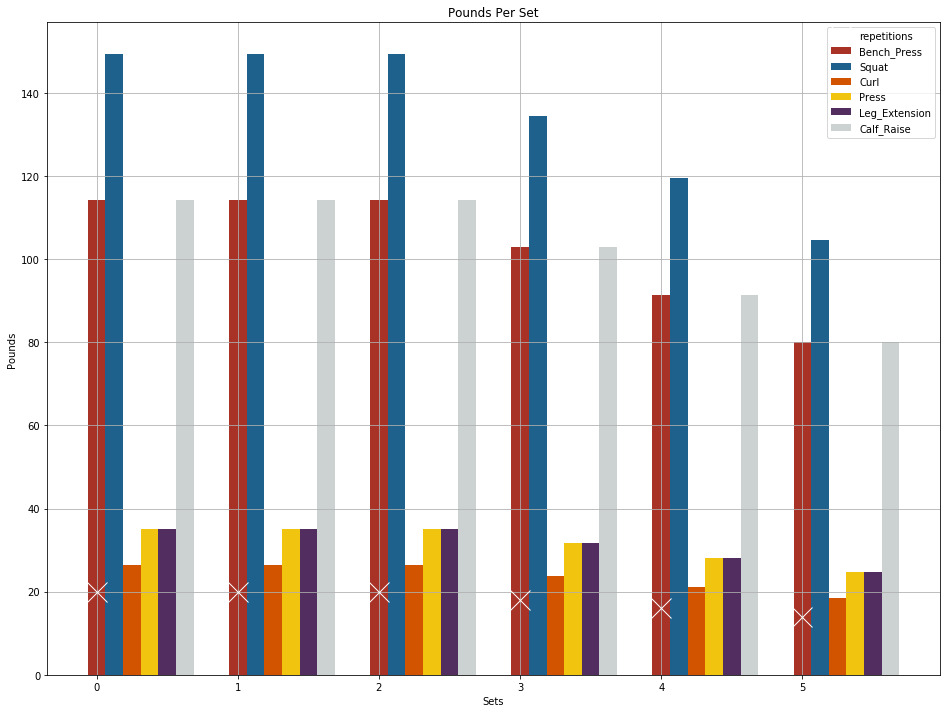

In [88]:
plotRoutine(data, routine)

# Creating a Routine
Every athletes routine will vary.  it is important to track progress and focus.  This information is valuable to the athletes trainer and fitness facility.  If the athlete is training at home, monitoring these features will help prevent a training plateau.  

In [69]:
dates = pd.date_range(start="2019-02-01", periods=90, freq="d")
df = pd.DataFrame(columns=['Stage','BFP', 'BW', 'Exercises', 'Set1_repititions', 'Week', 'Minutes_training'], index=dates)

In [70]:
df.head(10)

,Stage,BFP,BW,Exercises,Set1_repititions,Week,Minutes_training
2019-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Widgets Exercise
This exercise is in programming.  Time to squat with the docs.  
https://ipywidgets.readthedocs.io/en/stable/  

**Widget #1** - Plot Routine
##### Selectors  
1. Stage select 
2. Body Weight
3. BFP  
##### Actions
```python
workouts = applyStagetoPPS('advanced')  
routine = applyStagetoNS('expert', workouts)   
plotRoutine(routineToData(data), routine)  
```

**Widget #2** - Print Sets for focus  
###### Selectors  
1. Stage select 
2. Body Weight  
3. BFP
4. Focus
##### Actions
```python
workouts = applyStagetoPPS('advanced')  
routine = applyStagetoNS('expert', workouts)   
focusSet('Curl', routine) 
```

In [71]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [97]:
stage = widgets.Select(
    options=['beginner', 'intermediate', 'advanced', 'expert'],
    value='beginner',
    # rows=10,
    description='Stage:',
    disabled=False
)
bodyWeight = widgets.SelectionSlider(
    options=range(500),
    value=150,
    description='BW',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True
)
bodyFatPercentage = widgets.SelectionSlider(
    options=range(6,50),
    value=15,
    description='BFP',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True
)
button = widgets.Button(
    description='Build Set',
    layout={'width': '300px'}
)

In [98]:
def simDisplay(s, bw, bfp): 
    MW = (bw - ((bw*(bfp/100))))-W
    workouts = applyStagetoPPS(s, MW) 
    routine = applyStagetoNS(s, workouts, MW)   
    data = routineToData(routine)
    plotRoutine(data, routine)
    print(workouts)

In [99]:
out = widgets.interactive_output(simDisplay, {'s':stage, 'bw':bodyWeight, 'bfp':bodyFatPercentage})

In [100]:
widgets.HBox([widgets.VBox([stage, bodyWeight, bodyFatPercentage]), out])

# Widget Exercise #2
Come on, You can do it!